In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import json
from scipy.integrate import solve_ivp

np.set_printoptions(precision=5, suppress=True)
pd.set_option("display.precision", 15)
np.set_printoptions(formatter={'float': lambda x: "{0:0.7f}".format(x)})
pd.set_option('display.float_format', lambda x: "{0:0.7f}".format(x))
pd.set_option('display.max_columns', None)

# electric charging stations

# gas plot

In [46]:
gas_df = pd.read_csv("data/gas_prices_1993_2023.csv")
col_name = gas_df.columns[1]
gas_df = gas_df.rename(columns={col_name: "Gas Price"})
gas_df['Date'] = pd.to_datetime(gas_df['Date'])
gas_df.to_csv("data/gas_prices_1993_2023_clean.csv", index=False)
display(gas_df)

,Date,Gas Price
0,1993-04-05,1.068
1,1993-04-12,1.079
2,1993-04-19,1.079
3,1993-04-26,1.086
4,1993-05-03,1.086
...,...,...
1592,2023-10-09,3.814
1593,2023-10-16,3.706
1594,2023-10-23,3.660
1595,2023-10-30,3.600


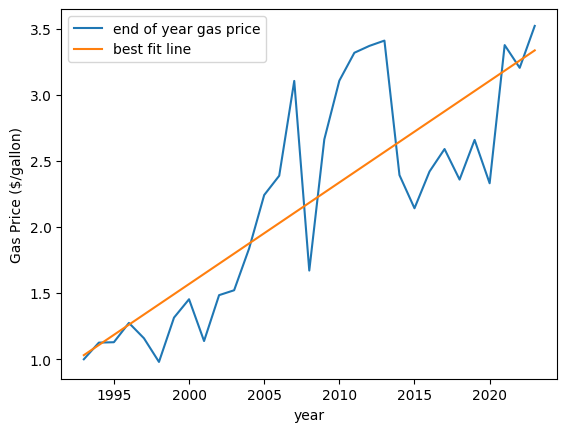

In [76]:
# load in the gas data
gas_df_orig = pd.read_csv("data/gas_prices_1993_2023_clean.csv")
gas_df_orig['Date'] = pd.to_datetime(gas_df_orig['Date'])
gas_df_orig['year'] = gas_df_orig['Date'].dt.year
gas_df_orig = gas_df_orig.drop_duplicates(subset=['year'], keep='last')

# plot the gas price
xs = gas_df_orig['year'].copy().values.astype(int)
gas_prices = gas_df_orig['Gas Price'].values
plt.plot(xs, gas_prices, label='end of year gas price')

# get the coefficients for the best fit line with 2000 as the reference time
ts = xs - 2000
A = np.vstack([ts, np.ones(len(ts))]).T
coefficients = la.lstsq(A, gas_prices)[0]
m, b = coefficients

ys = m * ts + b
plt.plot(xs, ys, label='best fit line')
plt.legend()
plt.xlabel("year")
plt.ylabel("Gas Price ($/gallon)")
plt.show()

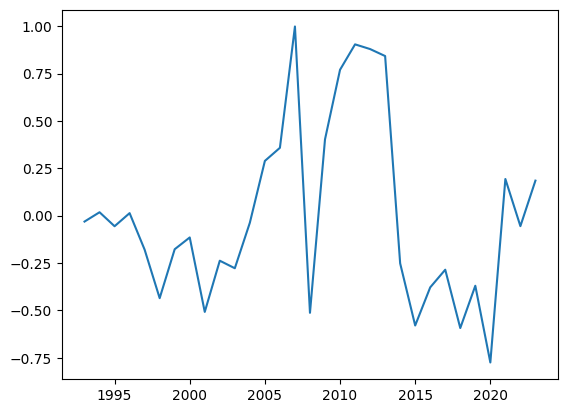

In [75]:
plt.plot(xs, gas_prices - ys)
plt.show()

In [63]:
gas_df = pd.read_csv("data/gas_prices_1993_2023_clean.csv")
gas_df['Date'] = pd.to_datetime(gas_df['Date'])
gas_df = gas_df.loc[gas_df['Date'].dt.year > 2000]
gas_df['year'] = gas_df['Date'].dt.year
gas_df = gas_df.drop_duplicates(subset=['year'], keep='last')
display(gas_df)

,Date,Gas Price,year
456,2001-12-31,1.137,2001
508,2002-12-30,1.484,2002
560,2003-12-29,1.521,2003
612,2004-12-27,1.838,2004
664,2005-12-26,2.241,2005
716,2006-12-25,2.387,2006
769,2007-12-31,3.104,2007
821,2008-12-29,1.670,2008
873,2009-12-28,2.662,2009
925,2010-12-27,3.106,2010


The best fit line is y = 0.0635x + 1.8329


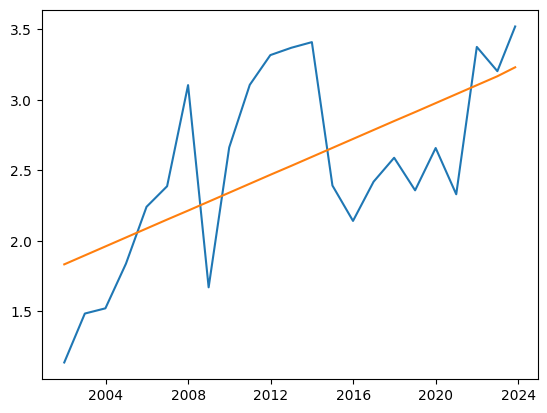

In [65]:
# compute the best fit line for the gas prices
A = np.vstack([np.ones(len(gas_df['Date'])), np.arange(len(gas_df['Date']))]).T
b = gas_df['Gas Price']

sol = la.lstsq(A, b)
b, m = sol[0]

print("The best fit line is y = {:.4f}x + {:.4f}".format(m, b))

plt.plot(gas_df['Date'], gas_df['Gas Price'])
plt.plot(gas_df['Date'], m * np.arange(len(gas_df['Date'])) + b)
plt.show()

# chargin stations, ports data

In [35]:
16822+126500+20431
163753 / 2.7

60649.259259259255

In [ ]:
electric_arr = sales['Electric'].values
electric_arr = electric_arr[electric_arr > 0]
electric_arr = np.concatenate([electric_arr, [electric_arr[-1]]*2])
#electric_arr[electric_arr < 100] = 100
print(electric_arr)

ln_x = np.log(electric_arr)

const_col = np.ones(len(ln_x))
ts = np.arange(len(ln_x)) + 11
A = np.vstack([const_col, ts]).T
A_t = ts.reshape((-1,1))
sol = la.lstsq(A, ln_x)[0]
print(sol)

b, a = sol

b = -0.3443
a = 0.2930

plt.plot(ts, np.exp(a * ts + b), label='Exponential Fit')
plt.scatter(ts, electric_arr, label='Actual Data')
plt.legend()
plt.xlabel("t")
plt.ylabel("Electric Sales")
plt.show()



-2.9820183677245296 0.3820993864765016


,Year,Charging Ports,Station Locations
0,2007,417,139
1,2008,564,196
2,2009,771,259
3,2010,1256,407
4,2011,5248,2109
5,2012,10726,5444
6,2013,16619,6938
7,2014,22470,9207
8,2015,26532,10710
9,2016,33165,13150


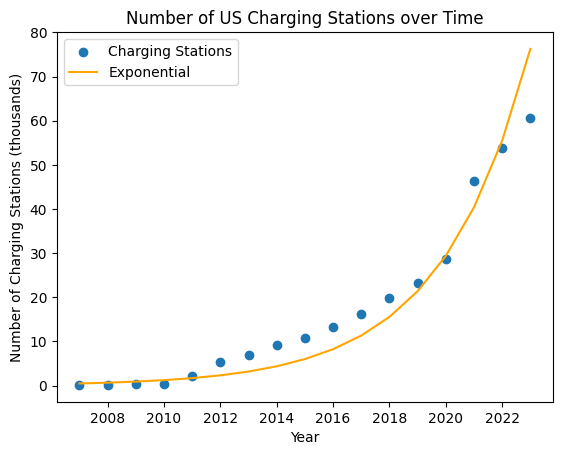

In [309]:

charging_df = pd.DataFrame({
    'Year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Charging Ports': [417, 564, 771, 1256, 5248, 10726, 16619, 22470, 26532, 33165, 45789, 56842, 73838, 96190, 114451, 136513, 163753],
    'Station Locations': [139, 196, 259, 407, 2109, 5444, 6938, 9207, 10710, 13150, 16170, 19893, 23282, 28602, 46407, 53764, 60649]
})
charging_df.to_csv("data/charging.csv", index=False)

ts = charging_df['Year'].values.astype(int) - 2000
const_col = np.ones(len(ts))
A = np.vstack([const_col, ts]).T
sol = la.lstsq(A, np.log(charging_df['Charging Ports']/1000))[0]
b, a = sol

print(b, a)

b = -2.98
a = 0.318


#charging_df['ratio'] = charging_df['charging ports'] / charging_df['station locations']
display(charging_df)
plt.scatter(charging_df['Year'], charging_df['Station Locations'] / 1000, label="Charging Stations")
plt.plot(ts + 2000, np.exp(a * ts + b), color='orange', label="Exponential")
plt.xlabel("Year")
plt.ylabel("Number of Charging Stations (thousands)")
plt.title("Number of US Charging Stations over Time")
plt.legend()
plt.show()


# load data

In [77]:
# load in the combustion sales
sales = pd.read_excel('combustion_sales.xlsx')
sales = sales.loc[(sales['Year'] >= 2000) & (sales['Year'] <= 2023), :].copy()

# add values for hybrid sales to these values
# https://www.bts.gov/content/gasoline-hybrid-and-electric-vehicle-sales
hybrid = pd.Series([10, 20, 40, 50, 90, 210, 250, 350, 310, 290, 275, 260, 460, 540, 510, 430, 420, 450, 460, 490, 530, 980, 980])
sales['Hybrid'] = hybrid.values

# add a column for electric sales
electric = pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 15, 40, 60, 70, 90, 105, 205, 230, 240, 460, 460])
sales["Electric"] = electric.values

sales["Total"] = sales[['Combustion', 'Hybrid', 'Electric']].sum(axis=1)
sales["Combustion_ratio"] = sales['Combustion'] / sales['Total']
sales["Hybrid_ratio"] = sales['Hybrid'] / sales['Total']
sales["Electric_ratio"] = sales['Electric'] / sales['Total']

sales.to_csv("data/vehicle_sales_2000_2023.csv", index=False)


display(sales)

,Year,Combustion,Hybrid,Electric,Total,Combustion_ratio,Hybrid_ratio,Electric_ratio
24,2000,17349.7,10,0,17359.7,0.999424,0.000576,0.000000
25,2001,17122.4,20,0,17142.4,0.998833,0.001167,0.000000
26,2002,16816.2,40,0,16856.2,0.997627,0.002373,0.000000
27,2003,16639.1,50,0,16689.1,0.997004,0.002996,0.000000
28,2004,16866.9,90,0,16956.9,0.994692,0.005308,0.000000
29,2005,16948.2,210,0,17158.2,0.987761,0.012239,0.000000
30,2006,16504.1,250,0,16754.1,0.985078,0.014922,0.000000
31,2007,16089.0,350,0,16439.0,0.978709,0.021291,0.000000
32,2008,13194.8,310,0,13504.8,0.977045,0.022955,0.000000
33,2009,10402.3,290,0,10692.3,0.972878,0.027122,0.000000


# electric exponential

-2.9820183677245296 0.3820993864765016


,Year,Charging Ports,Station Locations
0,2007,417,139
1,2008,564,196
2,2009,771,259
3,2010,1256,407
4,2011,5248,2109
5,2012,10726,5444
6,2013,16619,6938
7,2014,22470,9207
8,2015,26532,10710
9,2016,33165,13150


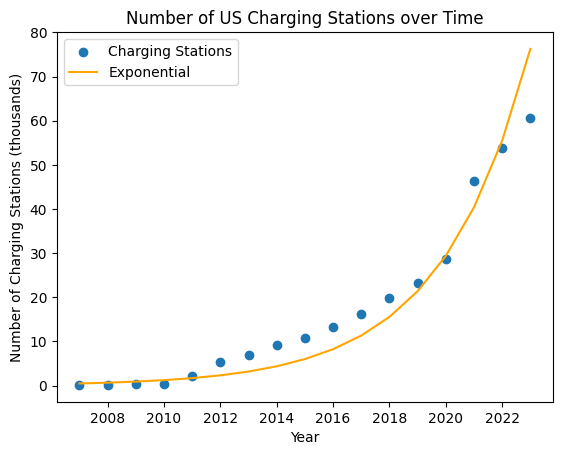

In [345]:

charging_df = pd.DataFrame({
    'Year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Charging Ports': [417, 564, 771, 1256, 5248, 10726, 16619, 22470, 26532, 33165, 45789, 56842, 73838, 96190, 114451, 136513, 163753],
    'Station Locations': [139, 196, 259, 407, 2109, 5444, 6938, 9207, 10710, 13150, 16170, 19893, 23282, 28602, 46407, 53764, 60649]
})
charging_df.to_csv("data/charging.csv", index=False)

ts = charging_df['Year'].values.astype(int) - 2000
const_col = np.ones(len(ts))
A = np.vstack([const_col, ts]).T
sol = la.lstsq(A, np.log(charging_df['Charging Ports']/1000))[0]
b, a = sol

print(b, a)

b = -2.98
a = 0.318


#charging_df['ratio'] = charging_df['charging ports'] / charging_df['station locations']
display(charging_df)
plt.scatter(charging_df['Year'], charging_df['Station Locations'] / 1000, label="Charging Stations")
plt.plot(ts + 2000, np.exp(a * ts + b), color='orange', label="Exponential")
plt.xlabel("Year")
plt.ylabel("Number of Charging Stations (thousands)")
plt.title("Number of US Charging Stations over Time")
plt.legend()
plt.show()


,Year,Combustion,Hybrid,Electric,Total,Combustion_ratio,Hybrid_ratio,Electric_ratio
0,2000,17349.7000000,10,0,17359.7000000,0.9994240,0.0005760,0.0000000
1,2001,17122.4000000,20,0,17142.4000000,0.9988333,0.0011667,0.0000000
2,2002,16816.2000000,40,0,16856.2000000,0.9976270,0.0023730,0.0000000
3,2003,16639.1000000,50,0,16689.1000000,0.9970040,0.0029960,0.0000000
4,2004,16866.9000000,90,0,16956.9000000,0.9946924,0.0053076,0.0000000
5,2005,16948.2000000,210,0,17158.2000000,0.9877610,0.0122390,0.0000000
6,2006,16504.1000000,250,0,16754.1000000,0.9850783,0.0149217,0.0000000
7,2007,16089.0000000,350,0,16439.0000000,0.9787092,0.0212908,0.0000000
8,2008,13194.8000000,310,0,13504.8000000,0.9770452,0.0229548,0.0000000
9,2009,10402.3000000,290,0,10692.3000000,0.9728777,0.0271223,0.0000000


[11 12 13 14 15 16 17 18 19 20 21 22]
[17.7911297 23.8479915 31.9668683 42.8497581 57.4376493 76.9918829
 103.2032144 138.3380047 185.4341811 248.5639111 333.1857026 446.6163729]
[17.7911297 23.8479915 31.9668683 42.8497581 57.4376493 76.9918829
 103.2032144 138.3380047 185.4341811 248.5639111 333.1857026 446.6163729]


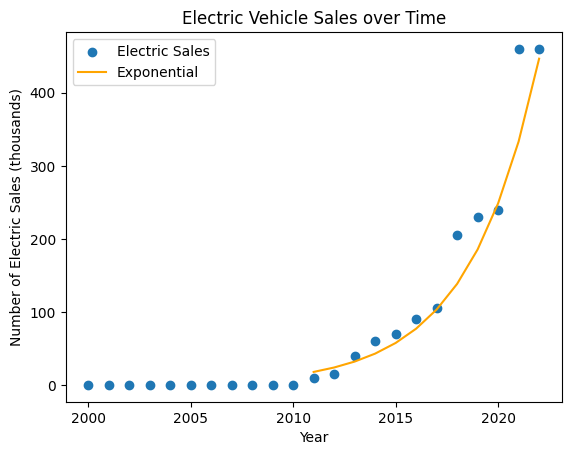

In [310]:
sales = pd.read_csv("data/vehicle_sales_2000_2023.csv")

with open("coefficients.json") as file:
    coefficients = json.load(file)
electric_coef = coefficients['electric']
a, b = electric_coef['a'], electric_coef['b']

display(sales)

tot_yrs = sales['Year'].copy().values.astype(int)
n_yrs = len(tot_yrs)
yrs = tot_yrs[tot_yrs > 2010]
n_yrs_after_2010 = len(yrs)
xs = yrs - 2000
print(xs)
expo_fit = np.exp(a * xs + b)
print(expo_fit)
#expo_fit = [0.0] * (n_yrs - n_yrs_after_2010) + list(expo_fit)
print(expo_fit)

plt.scatter(tot_yrs, sales['Electric'], label="Electric Sales")
plt.plot(yrs, expo_fit, color="orange", label="Exponential")
plt.ylabel("Number of Electric Sales (thousands)")
plt.xlabel("Year")
plt.title("Electric Vehicle Sales over Time")
#plt.text(f"$y = \exp({a} * t {b})$")
plt.legend()
plt.show()

[ 10  15  40  60  70  90 105 205 230 240 460 460 460 460]
[-0.34429777  0.29299154]


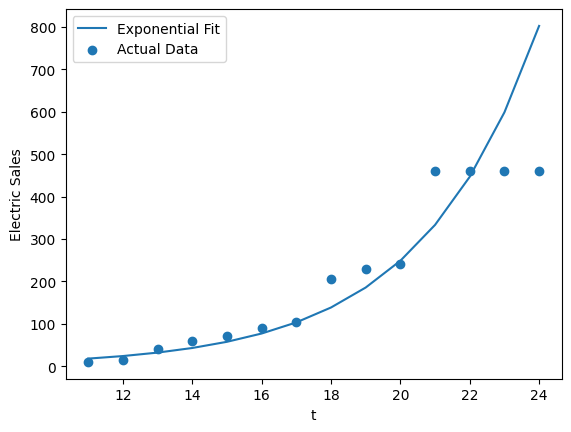

In [59]:
electric_arr = sales['Electric'].values
electric_arr = electric_arr[electric_arr > 0]
electric_arr = np.concatenate([electric_arr, [electric_arr[-1]]*2])
#electric_arr[electric_arr < 100] = 100
print(electric_arr)

ln_x = np.log(electric_arr)

const_col = np.ones(len(ln_x))
ts = np.arange(len(ln_x)) + 11
A = np.vstack([const_col, ts]).T
A_t = ts.reshape((-1,1))
sol = la.lstsq(A, ln_x)[0]
print(sol)

b, a = sol

b = -0.3443
a = 0.2930

plt.plot(ts, np.exp(a * ts + b), label='Exponential Fit')
plt.scatter(ts, electric_arr, label='Actual Data')
plt.legend()
plt.xlabel("t")
plt.ylabel("Electric Sales")
plt.show()



In [ ]:
plt.plot(sales['Year'], sales['Combustion'], label='Combustion')

# predator prey model

In [127]:
# load the charging data
charging_df = pd.read_csv("data/charging.csv")
display(charging_df)

# load the sales data
sales_df = pd.read_csv("data/vehicle_sales_2000_2023.csv")
sales_df = sales_df.merge(charging_df, on='Year', how='left')
sales_df['Charging Ports'] = sales_df['Charging Ports'].fillna(0).astype(float) / 1000
sales_df['Station Locations'] = sales_df['Station Locations'].fillna(0).astype(float) / 1000
sales_df['Station Locations Ratio'] = sales_df['Station Locations'] / sales_df['Total']
display(sales_df)

rel_sales_df = sales_df.loc[sales_df['Year'] >= 2011, :].copy()
display(rel_sales_df)

,Year,Charging Ports,Station Locations
0,2007,417,139
1,2008,564,196
2,2009,771,259
3,2010,1256,407
4,2011,5248,2109
5,2012,10726,5444
6,2013,16619,6938
7,2014,22470,9207
8,2015,26532,10710
9,2016,33165,13150


,Year,Combustion,Hybrid,Electric,Total,Combustion_ratio,Hybrid_ratio,Electric_ratio,Charging Ports,Station Locations,Station Locations Ratio
0,2000,17349.7,10,0,17359.7,0.999424,0.000576,0.000000,0.000,0.000,0.000000
1,2001,17122.4,20,0,17142.4,0.998833,0.001167,0.000000,0.000,0.000,0.000000
2,2002,16816.2,40,0,16856.2,0.997627,0.002373,0.000000,0.000,0.000,0.000000
3,2003,16639.1,50,0,16689.1,0.997004,0.002996,0.000000,0.000,0.000,0.000000
4,2004,16866.9,90,0,16956.9,0.994692,0.005308,0.000000,0.000,0.000,0.000000
5,2005,16948.2,210,0,17158.2,0.987761,0.012239,0.000000,0.000,0.000,0.000000
6,2006,16504.1,250,0,16754.1,0.985078,0.014922,0.000000,0.000,0.000,0.000000
7,2007,16089.0,350,0,16439.0,0.978709,0.021291,0.000000,0.417,0.139,0.000008
8,2008,13194.8,310,0,13504.8,0.977045,0.022955,0.000000,0.564,0.196,0.000015
9,2009,10402.3,290,0,10692.3,0.972878,0.027122,0.000000,0.771,0.259,0.000024


,Year,Combustion,Hybrid,Electric,Total,Combustion_ratio,Hybrid_ratio,Electric_ratio,Charging Ports,Station Locations,Station Locations Ratio
11,2011,12741.8,260,10,13011.8,0.979250,0.019982,0.000769,5.248,2.109,0.000162
12,2012,14433.2,460,15,14908.2,0.968138,0.030856,0.001006,10.726,5.444,0.000365
13,2013,15530.1,540,40,16110.1,0.963998,0.033519,0.002483,16.619,6.938,0.000431
14,2014,16452.2,510,60,17022.2,0.966514,0.029961,0.003525,22.470,9.207,0.000541
15,2015,17408.0,430,70,17908.0,0.972080,0.024012,0.003909,26.532,10.710,0.000598
16,2016,17477.3,420,90,17987.3,0.971647,0.023350,0.005004,33.165,13.150,0.000731
17,2017,17150.1,450,105,17705.1,0.968653,0.025416,0.005930,45.789,16.170,0.000913
18,2018,17224.9,460,205,17889.9,0.962828,0.025713,0.011459,56.842,19.893,0.001112
19,2019,16961.1,490,230,17681.1,0.959279,0.027713,0.013008,73.838,23.282,0.001317
20,2020,14471.8,530,240,15241.8,0.949481,0.034773,0.015746,96.190,28.602,0.001877


\begin{align}
\dot C(t) &= -K_{ch} C(t)H(t) - K_{ce} C(t)E(t) \\
\dot H(t) &= K_{ch} C(t)H(t) - K_{he} H(t)E(t) \\
\dot E(t) &= (K_{ce} C(t)E(t) + K_{he} H(t)E(t) + \alpha S(t)) (1 - E(t)) \\
\dot S(t) &= \beta S(t)(1 - \frac{S(t)}{C_s})
\end{align}

In [321]:

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

print(colors)

color_map = {
    'blue': colors[0],
    'orange': colors[1],
    'green': colors[2],
    'red': colors[3],
}

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


[[0.9792496]
 [0.0199819]
 [0.0007685]
 [0.0001621]]


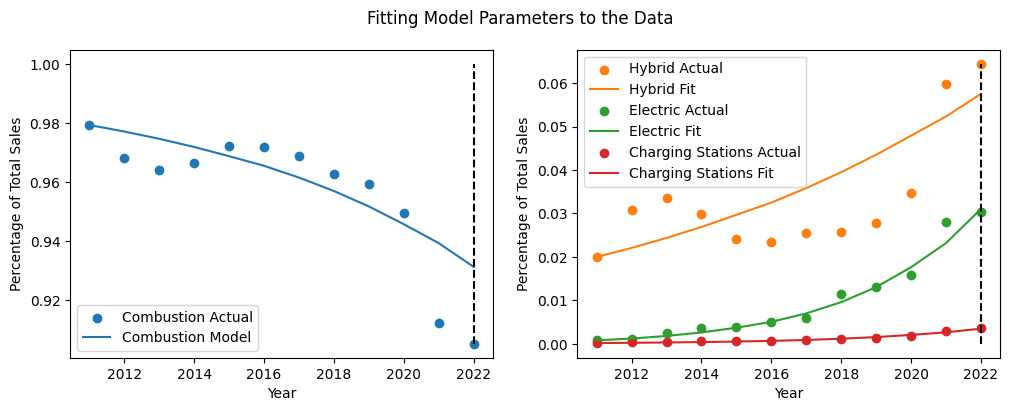

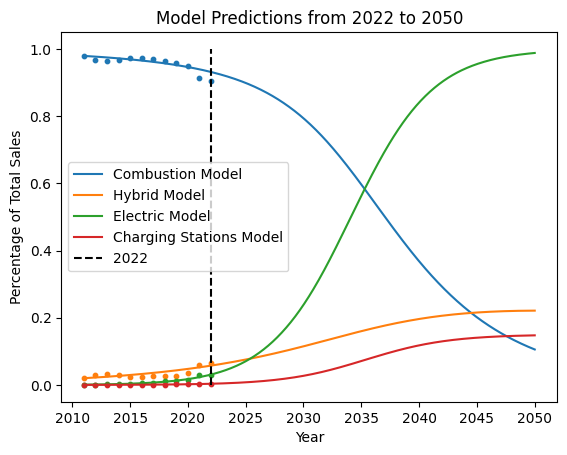

model_C in 2022: 0.9312385162074331
actualC in 2022: 0.9052276182515812
model_H in 2022: 0.05755245803921581
actualH in 2022: 0.0644978709121183
model_E in 2022: 0.031035190914776165
actualE in 2022: 0.0302745108363004
model_S in 2022: 0.0034675998576907834
actualS in 2022: 0.003538432175223604


In [365]:
def ces(t, y, K_ch, K_ce, K_he, alpha, beta, C_s):
    #print(y[0], y[1], y[2], y[3], C_s, y[3] / C_s)
    return (
        -K_ch * y[0] * y[1] - K_ce * y[0] * y[2],
        K_ch * y[0] * y[1] - K_he * y[1] * y[2],
        (K_ce * y[0] * y[2] + K_he * y[1] * y[2] + alpha * y[3]) * (1-y[2]),
        beta * y[3] * (1 - y[3] / C_s)
    )
# go from 2011 to 2050
t_span = (0, 50-11)
ts = np.linspace(*t_span, 500)

ts_int = ts.astype(int)
ts_yr_inds = np.where(ts_int[1:] != ts_int[:-1])[0] + 1
ts_yr_inds = np.concatenate([[0], ts_yr_inds])

mn_yr, mx_yr = rel_sales_df['Year'].min(), rel_sales_df['Year'].max()
ts_2011 = (ts[ts_yr_inds] + 2011).astype(int)
inner_years = (ts_2011 >= mn_yr) & (ts_2011 <= mx_yr)
inner_ts_yr_inds = ts_yr_inds[inner_years]

c_shift = 0.0
all_shift = 1

y0 = np.array([
    0.979250,
    0.019982,
    0.000769,
    0.000162
])

y0 = np.array([
    rel_sales_df['Combustion_ratio'].values[0],
    rel_sales_df['Hybrid_ratio'].values[0],
    rel_sales_df['Electric_ratio'].values[0],
    rel_sales_df['Station Locations Ratio'].values[0]
])

print(y0.reshape((-1,1)))

K_ch = 0.10
K_ce = 0.11
K_he = 0.01
alpha = 1.7
beta = 0.28
C_s = 0.15#0.003538 * 3.2
solution = solve_ivp(ces, t_span, y0, t_eval=ts, args=(K_ch, K_ce, K_he, alpha, beta, C_s))

C = rel_sales_df['Combustion_ratio'].values
H = rel_sales_df['Hybrid_ratio'].values
E = rel_sales_df['Electric_ratio'].values
S = rel_sales_df['Station Locations Ratio'].values

model_yrs = ts + 2011
model_C = solution.y[0]
model_H = solution.y[1]
model_E = solution.y[2]
model_S = solution.y[3]

plt.subplot(1,2,1)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color=color_map['blue'], label='Combustion Actual')
plt.plot(rel_sales_df['Year'], model_C[inner_ts_yr_inds], color=color_map['blue'], label='Combustion Model')
plt.vlines(2022, rel_sales_df['Combustion_ratio'].min(), 1, linestyles='dashed', color='black')
plt.legend(loc='lower left')
plt.ylabel("Percentage of Total Sales")
plt.xlabel("Year")

plt.subplot(1,2,2)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color=color_map['orange'], label='Hybrid Actual')
plt.plot(rel_sales_df['Year'], model_H[inner_ts_yr_inds], color=color_map['orange'], label='Hybrid Fit')
plt.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color=color_map['green'], label='Electric Actual')
plt.plot(rel_sales_df['Year'], model_E[inner_ts_yr_inds], color=color_map['green'], label='Electric Fit')
plt.scatter(rel_sales_df['Year'], rel_sales_df['Station Locations Ratio'], color=color_map['red'], label='Charging Stations Actual')
plt.plot(rel_sales_df['Year'], model_S[inner_ts_yr_inds], color=color_map['red'], label='Charging Stations Fit')
plt.vlines(2022, 0, rel_sales_df['Hybrid_ratio'].max(), linestyles='dashed', color='black')
plt.legend()
plt.xlabel("Year")
plt.ylabel("Percentage of Total Sales")

plt.suptitle("Fitting Model Parameters to the Data")
plt.gcf().set_size_inches(12, 4)
plt.show()


dot_size = 10
plt.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color=color_map['orange'], s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color=color_map['blue'], s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color=color_map['green'], s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Station Locations Ratio'], color=color_map['red'], s=dot_size)
#plt.scatter(rel_sales_df['Year'], all_shift * (rel_sales_df['Combustion_ratio']-c_shift), label='Combustion')
plt.plot(model_yrs, model_C, label='Combustion Model')
#plt.scatter(rel_sales_df['Year'], all_shift * rel_sales_df['Hybrid_ratio'], label='Hybrid')
plt.plot(model_yrs, model_H, label='Hybrid Model')
#plt.scatter(rel_sales_df['Year'], all_shift * rel_sales_df['Electric_ratio'], label='Electric')
plt.plot(model_yrs, model_E, label='Electric Model')
#plt.scatter(rel_sales_df['Year'], all_shift * rel_sales_df['Station Locations Ratio'], label='Charging Stations')
plt.plot(model_yrs, model_S, label='Charging Stations Model')
plt.vlines(2022, 0, 1, linestyles='dashed', color='black', label='2022')
plt.title("Model from 2011 to 2050")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Sales")
plt.legend()

plt.title("Model Predictions from 2022 to 2050")
plt.show()

ind_2022 = np.argsort(np.abs(ts + 2011 - 2022))[0]
print("model_C in 2022:", model_C[ind_2022])
print("actualC in 2022:", C[-1])
print("model_H in 2022:", model_H[ind_2022])
print("actualH in 2022:", H[-1])
print("model_E in 2022:", model_E[ind_2022])
print("actualE in 2022:", E[-1])
print("model_S in 2022:", model_S[ind_2022])
print("actualS in 2022:", S[-1])




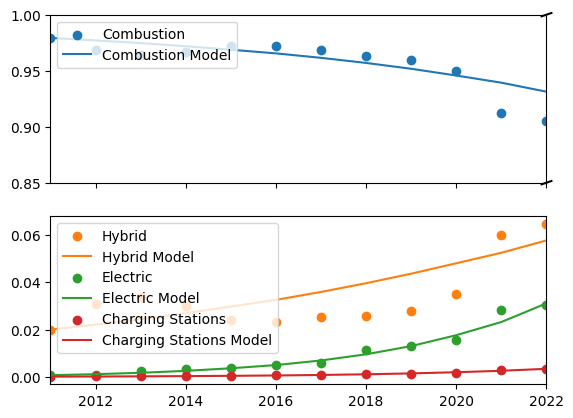

In [331]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined your data and models
# rel_sales_df, model_C, model_H, model_E, model_S, inner_ts_yr_inds, color_map

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 1]})
fig.subplots_adjust(hspace=0.05)

# Plot Combustion in the top subplot
ax1.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color=color_map['blue'], label='Combustion')
ax1.plot(rel_sales_df['Year'], model_C[inner_ts_yr_inds], color=color_map['blue'], label='Combustion Model')

# Create a broken y-axis
ax1.set_xlim(min(rel_sales_df['Year']), max(rel_sales_df['Year']))
ax1.set_ylim(0.85, 1)  # Set your y-axis limits

# Create a broken line in the y-axis
d = .01  # Set the distance of the break lines
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Plot Hybrid, Electric, and Charging Stations in the bottom subplot
ax2.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color=color_map['orange'], label='Hybrid')
ax2.plot(rel_sales_df['Year'], model_H[inner_ts_yr_inds], color=color_map['orange'], label='Hybrid Model')

ax2.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color=color_map['green'], label='Electric')
ax2.plot(rel_sales_df['Year'], model_E[inner_ts_yr_inds], color=color_map['green'], label='Electric Model')

ax2.scatter(rel_sales_df['Year'], rel_sales_df['Station Locations Ratio'], color=color_map['red'], label='Charging Stations')
ax2.plot(rel_sales_df['Year'], model_S[inner_ts_yr_inds], color=color_map['red'], label='Charging Stations Model')

# Show legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

# Show the plot
plt.show()


In [279]:
ts_int = ts.astype(int)
ts_yr_inds = np.where(ts_int[1:] != ts_int[:-1])[0] + 1
ts_yr_inds = np.concatenate([[0], ts_yr_inds])

mn_yr, mx_yr = rel_sales_df['Year'].min(), rel_sales_df['Year'].max()
ts_2011 = (ts[ts_yr_inds] + 2011).astype(int)
inner_years = (ts_2011 >= mn_yr) & (ts_2011 <= mx_yr)
inner_ts_yr_inds = ts_yr_inds[inner_years]

print(ts[ts_yr_inds] + 2011)

[2011.0000000 2012.0160321 2013.0320641 2014.0480962 2015.0641283
 2016.0020040 2017.0180361 2018.0340681 2019.0501002 2020.0661323
 2021.0040080 2022.0200401 2023.0360721 2024.0521042 2025.0681363
 2026.0060120 2027.0220441 2028.0380762 2029.0541082 2030.0701403
 2031.0080160 2032.0240481 2033.0400802 2034.0561122 2035.0721443
 2036.0100200 2037.0260521 2038.0420842 2039.0581162 2040.0741483
 2041.0120240 2042.0280561 2043.0440882 2044.0601202 2045.0761523
 2046.0140281 2047.0300601 2048.0460922 2049.0621242 2050.0000000]


In [289]:
mn_yr, mx_yr = rel_sales_df['Year'].min(), rel_sales_df['Year'].max()
ts_2011 = (ts[ts_yr_inds] + 2011).astype(int)
inner_years = (ts_2011 >= mn_yr) & (ts_2011 <= mx_yr)
inner_ts_yr_inds = ts_yr_inds[inner_years]

C_ = model_C[inner_ts_yr_inds]
H_ = model_H[inner_ts_yr_inds]
E_ = model_E[inner_ts_yr_inds]
S_ = model_S[inner_ts_yr_inds]

print(inner_ts_yr_inds)



thingy = (
    (C - C_) + 
    (H - H_) + 
    (E - E_) +
    (S - S_))

print(thingy)
print(thingy.shape)

[  0  13  26  39  52  64  77  90 103 116 128 141]
[0.0000000 -0.0006234 -0.0016768 -0.0030791 -0.0050653 -0.0074477
 -0.0108889 -0.0155490 -0.0218486 -0.0299511 -0.0394344 -0.0532842]
(12,)
